In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [28]:
codedir = '/'.join(os.getcwd().split("/")[:-1])
pipe_res = os.path.join(codedir,"pipe")
chan_res = os.path.join(codedir,"channel")
bl_res   = os.path.join(codedir,"bl")
turbmodels = ['SA','VF','SST','MK']

In [102]:
dfs_pipe = [ pd.read_fwf(os.path.join(pipe_res,'Inflow_'+t+'.csv')) for t in turbmodels]
dfs_chan = [ pd.read_fwf(os.path.join(chan_res,'Inflow_'+t+'.csv')) for t in turbmodels]
dfs_bl   = [ pd.read_fwf(os.path.join(bl_res  ,'Inflow_'+t+'.csv')) for t in turbmodels]

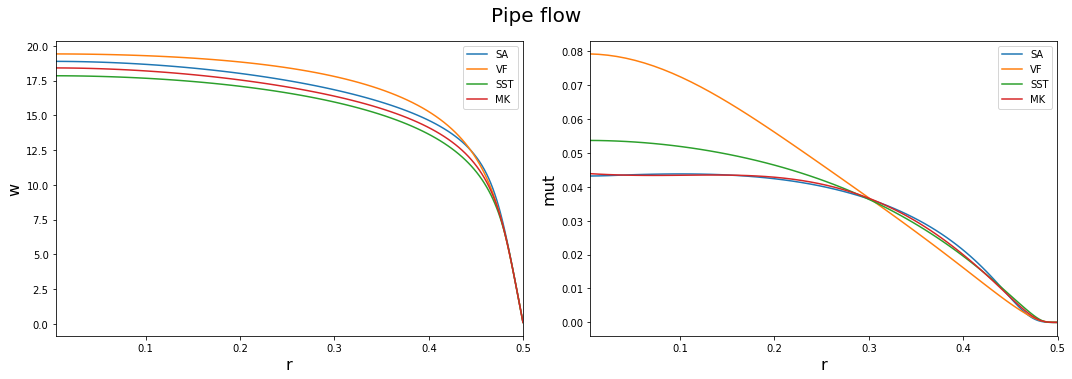

In [107]:
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(12,5.5))
for i,df in enumerate(dfs_pipe):
    df.plot('y','w',ax=ax1, label=turbmodels[i])
    df.plot('y','mut',ax=ax2, label=turbmodels[i])
ax1.set_xlabel("r",  fontsize=16)
ax1.set_ylabel("w",  fontsize=16)
ax2.set_xlabel("r",  fontsize=16)
ax2.set_ylabel("mut",fontsize=16)
fig.tight_layout(rect=[0.,0.,1.0, 0.9]), 
fig.suptitle('Pipe flow', y=0.95, fontsize=20)
fig.savefig("pipe.png")

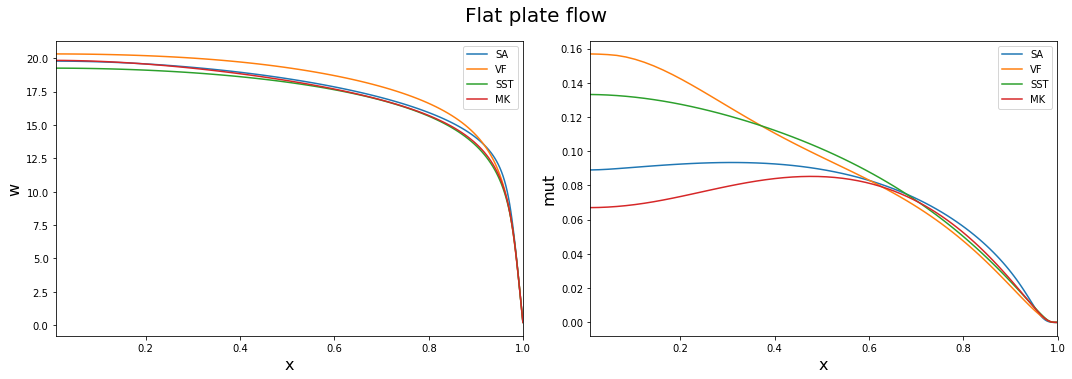

In [108]:
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(12.,5.5))
for i,df in enumerate(dfs_bl):
    df.plot('y','w',ax=ax1, label=turbmodels[i])
    df.plot('y','mut',ax=ax2, label=turbmodels[i])
ax1.set_xlabel("x",  fontsize=16)
ax1.set_ylabel("w",  fontsize=16)
ax2.set_xlabel("x",  fontsize=16)
ax2.set_ylabel("mut",fontsize=16)
fig.tight_layout(rect=[0.,0.,1.0, 0.9]), 
fig.suptitle('Flat plate flow', y=0.95, fontsize=20)
fig.savefig("bl.png")

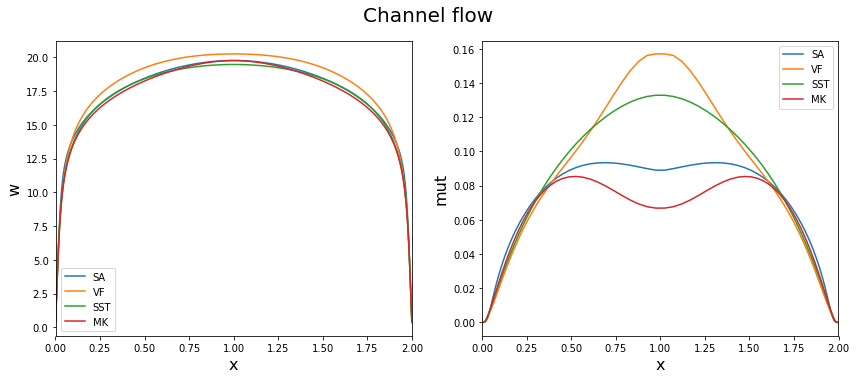

In [109]:
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(12.,5.5))
for i,df in enumerate(dfs_chan):
    df.plot('y','w',ax=ax1, label=turbmodels[i])
    df.plot('y','mut',ax=ax2, label=turbmodels[i])
ax1.set_xlabel("x",  fontsize=16)
ax1.set_ylabel("w",  fontsize=16)
ax2.set_xlabel("x",  fontsize=16)
ax2.set_ylabel("mut",fontsize=16)
fig.tight_layout(rect=[0.,0.,1.0, 0.9]), 
fig.suptitle('Channel flow', y=0.95, fontsize=20)
fig.savefig("channel.png")